In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
# Load the gender submission data
gender_submission = pd.read_csv("/kaggle/input/titanic/gender_submission.csv")


In [3]:
# Load the training data
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")

# Load the test data
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")


In [4]:
# Display the first few rows of each dataset to understand its structure
print("Training Data:")
print(train_data.head())
print("\nTest Data:")
print(test_data.head())
print("\nGender Submission Data:")
print(gender_submission.head())

Training Data:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   Na

In [5]:
# Summary statistics
print("Summary Statistics:")
print(train_data.describe())

Summary Statistics:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


Text(0.5, 1.0, 'Survival Distribution')

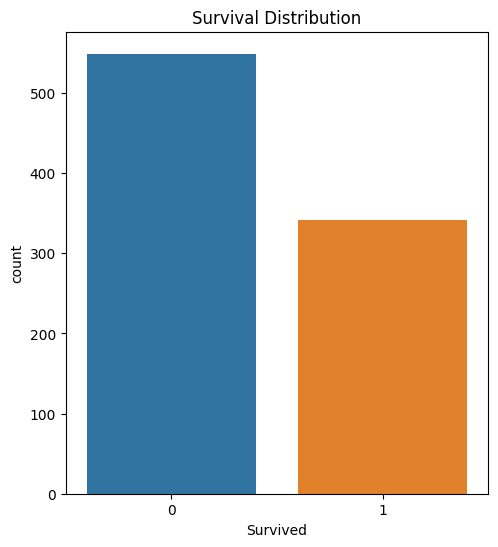

In [6]:
# Visualize the distribution of some key features
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='Survived', data=train_data)
plt.title('Survival Distribution')

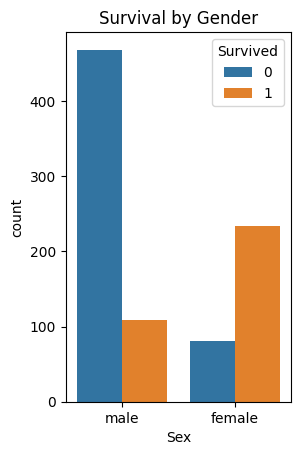

In [7]:
plt.subplot(1, 2, 2)
sns.countplot(x='Sex', hue='Survived', data=train_data)
plt.title('Survival by Gender')
plt.show()

In [8]:
# Check for missing values in the training dataset
print("Missing values in training data:")
print(train_data.isnull().sum())

Missing values in training data:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [9]:
# Check for missing values in the test dataset
print("\nMissing values in test data:")
print(test_data.isnull().sum())


Missing values in test data:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [10]:
# Perform one-hot encoding for 'Sex' variable
train_data = pd.get_dummies(train_data, columns=['Sex'], drop_first=True)
test_data = pd.get_dummies(test_data, columns=['Sex'], drop_first=True)

In [11]:
# Perform label encoding for 'Embarked' variable
train_data['Embarked'] = train_data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
test_data['Embarked'] = test_data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [12]:
# Check the updated datasets
print("Updated training data:")
print(train_data.head())

Updated training data:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
2                             Heikkinen, Miss. Laina  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
4                           Allen, Mr. William Henry  35.0      0      0   

             Ticket     Fare Cabin  Embarked  Sex_male  
0         A/5 21171   7.2500   NaN       0.0      True  
1          PC 17599  71.2833   C85       1.0     False  
2  STON/O2. 3101282   7.9250   NaN       0.0     False  
3            113803  53.1000  C123       0.0     False  
4            37345

In [13]:
print("\nUpdated test data:")
print(test_data.head())


Updated test data:
   PassengerId  Pclass                                          Name   Age  \
0          892       3                              Kelly, Mr. James  34.5   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  47.0   
2          894       2                     Myles, Mr. Thomas Francis  62.0   
3          895       3                              Wirz, Mr. Albert  27.0   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  22.0   

   SibSp  Parch   Ticket     Fare Cabin  Embarked  Sex_male  
0      0      0   330911   7.8292   NaN         2      True  
1      1      0   363272   7.0000   NaN         0     False  
2      0      0   240276   9.6875   NaN         2      True  
3      0      0   315154   8.6625   NaN         0      True  
4      1      1  3101298  12.2875   NaN         0     False  


In [14]:
# Create a new feature 'FamilySize' by adding 'SibSp' and 'Parch'
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch'] + 1

In [15]:
# Drop 'SibSp' and 'Parch' columns as we have already extracted information into 'FamilySize'
train_data.drop(['SibSp', 'Parch'], axis=1, inplace=True)
test_data.drop(['SibSp', 'Parch'], axis=1, inplace=True)

In [16]:
# Check the updated datasets
print("Updated training data:")
print(train_data.head())

Updated training data:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name   Age            Ticket  \
0                            Braund, Mr. Owen Harris  22.0         A/5 21171   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0          PC 17599   
2                             Heikkinen, Miss. Laina  26.0  STON/O2. 3101282   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0            113803   
4                           Allen, Mr. William Henry  35.0            373450   

      Fare Cabin  Embarked  Sex_male  FamilySize  
0   7.2500   NaN       0.0      True           2  
1  71.2833   C85       1.0     False           2  
2   7.9250   NaN       0.0     False           1  
3  53.1000  C123       0.0     False           2  
4   8.0500   NaN       0

In [17]:
print("\nUpdated test data:")
print(test_data.head())


Updated test data:
   PassengerId  Pclass                                          Name   Age  \
0          892       3                              Kelly, Mr. James  34.5   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  47.0   
2          894       2                     Myles, Mr. Thomas Francis  62.0   
3          895       3                              Wirz, Mr. Albert  27.0   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  22.0   

    Ticket     Fare Cabin  Embarked  Sex_male  FamilySize  
0   330911   7.8292   NaN         2      True           1  
1   363272   7.0000   NaN         0     False           2  
2   240276   9.6875   NaN         2      True           1  
3   315154   8.6625   NaN         0      True           1  
4  3101298  12.2875   NaN         0     False           3  


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [19]:
# Split the training data into features and target variable
X_train = train_data.drop(['PassengerId', 'Survived'], axis=1)
y_train = train_data['Survived']

In [20]:
# Split the training data into training and validation sets
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [21]:
print("Data Types in Training Data:")
print(train_data.dtypes)

Data Types in Training Data:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Age            float64
Ticket          object
Fare           float64
Cabin           object
Embarked       float64
Sex_male          bool
FamilySize       int64
dtype: object


In [22]:
# Drop 'Name', 'Ticket', and 'Cabin' columns from the training and test datasets
train_data.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
test_data.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [23]:
# Impute missing values in the 'Embarked' column with the most frequent value
most_frequent_embarked = train_data['Embarked'].mode()[0]
train_data['Embarked'] = train_data['Embarked'].fillna(most_frequent_embarked)
test_data['Embarked'] = test_data['Embarked'].fillna(most_frequent_embarked)


In [24]:
# Convert 'Embarked' column to integer type
train_data['Embarked'] = train_data['Embarked'].astype(int)
test_data['Embarked'] = test_data['Embarked'].astype(int)

In [25]:
print("Unique values in the 'Embarked' column:")
print(train_data['Embarked'].unique())

Unique values in the 'Embarked' column:
[0 1 2]


In [26]:
# Find rows where 'Embarked' column contains the string value 'Partner, Mr. Austen'
problematic_rows_train = train_data[train_data['Embarked'] == 'Partner, Mr. Austen']
problematic_rows_test = test_data[test_data['Embarked'] == 'Partner, Mr. Austen']


In [27]:
print("Problematic rows in training data:")
print(problematic_rows_train)

Problematic rows in training data:
Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Age, Fare, Embarked, Sex_male, FamilySize]
Index: []


In [28]:
print("Problematic rows in test data:")
print(problematic_rows_test)

Problematic rows in test data:
Empty DataFrame
Columns: [PassengerId, Pclass, Age, Fare, Embarked, Sex_male, FamilySize]
Index: []
